In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [62]:
#q1

data = pd.read_csv('Instagram-Reach.csv')

print("Data:")
print(data.info())
print("\nNull Values:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())


Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None

Null Values:
Date               0
Instagram reach    0
dtype: int64

Descriptive Statistics:
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


In [63]:
#q2

data['Date'] = pd.to_datetime(data['Date'])

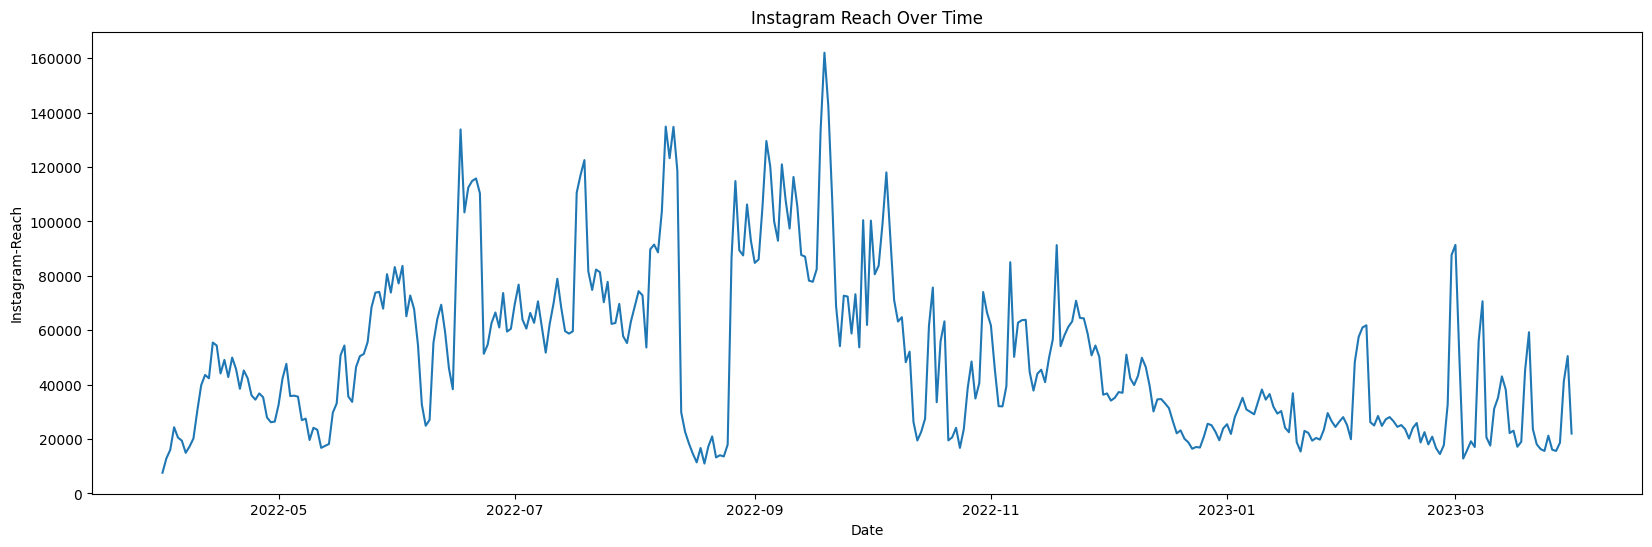

In [64]:
#q3
#analyzing trend using line chart

plt.figure(figsize=(20, 6))
plt.plot(data['Date'], data['Instagram reach'])
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram-Reach')
plt.show()

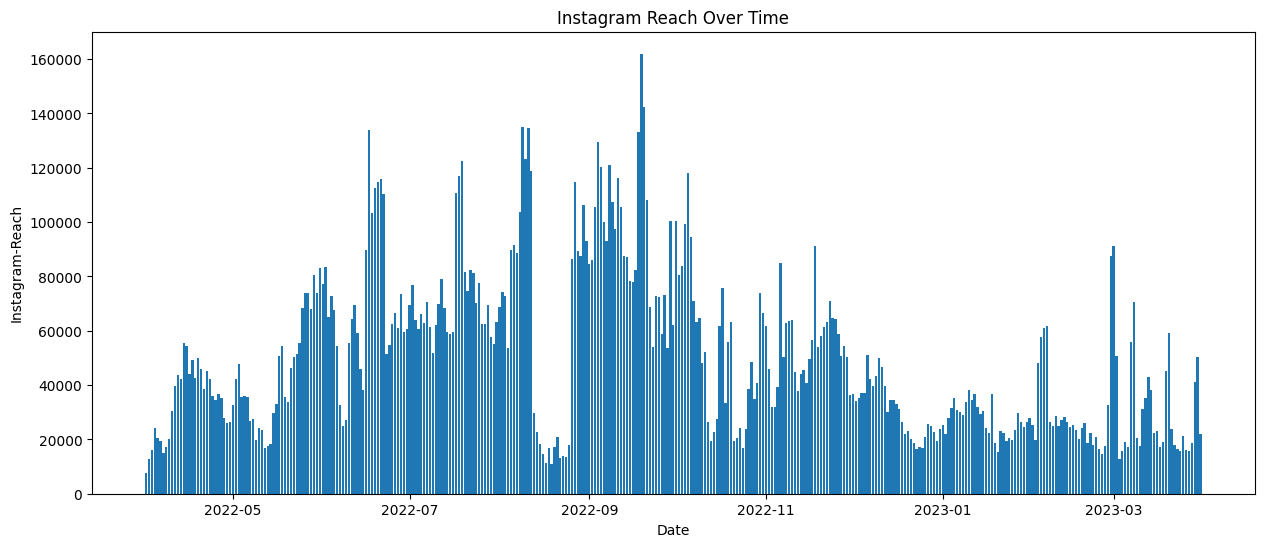

In [67]:
#q4
#analyzing trend using bar chart

plt.figure(figsize=(15, 6))
plt.bar(data['Date'], data['Instagram reach'])
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram-Reach')
plt.show()

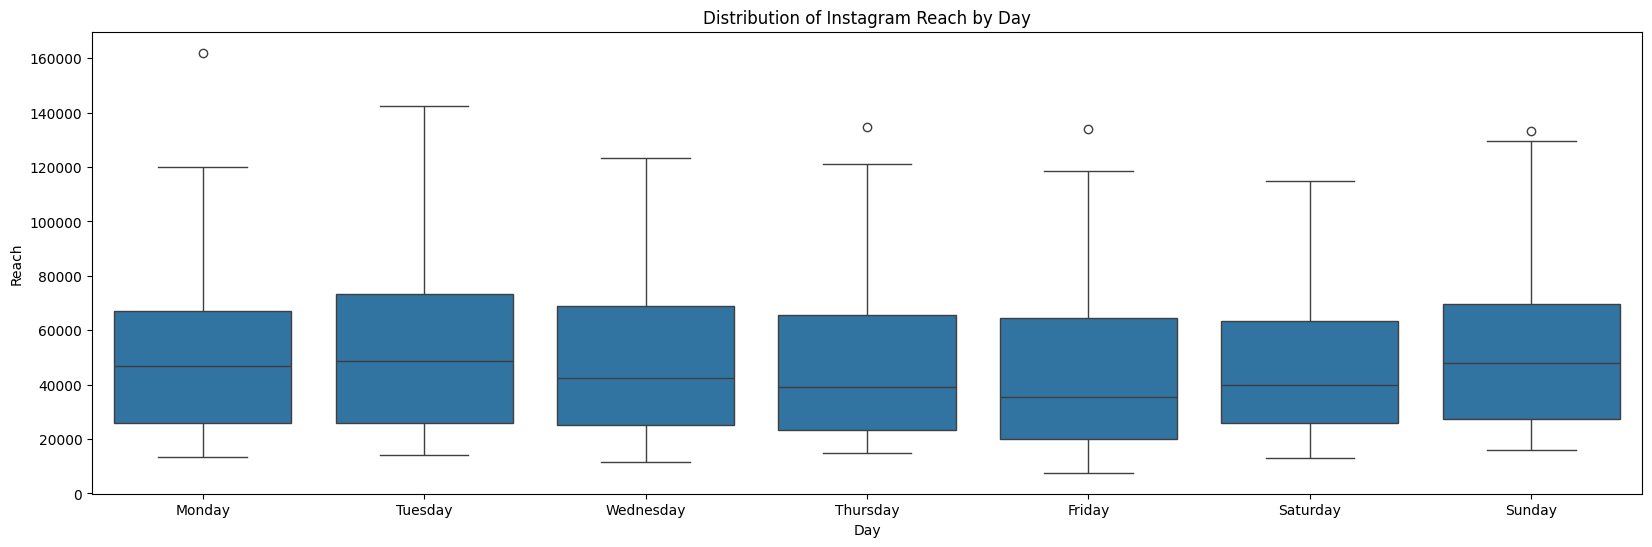

In [19]:
#q5
#analyzing data using box plot

plt.figure(figsize=(20, 6))
sns.boxplot(x='Day', y='Instagram reach', data=data)
plt.title('Distribution of Instagram Reach by Day')
plt.xlabel('Day')
plt.ylabel('Instagram-Reach')
plt.show()

In [20]:
#q6
# Creating a new column for the day of the week
data['Day'] = data['Date'].dt.day_name()

In [56]:

#q7
reach_by_day = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

reach_by_day

,mean,median,std
Day,,,
Monday,52621.692308,46853.0,32296.071347
Tuesday,54030.557692,48786.0,32503.726482
Wednesday,51017.269231,42320.5,29047.869685
Thursday,48570.923077,39150.0,28623.220625
Friday,46666.849057,35574.0,29856.943036
Saturday,47374.750000,40012.0,27667.043634
Sunday,53114.173077,47797.0,30906.162384


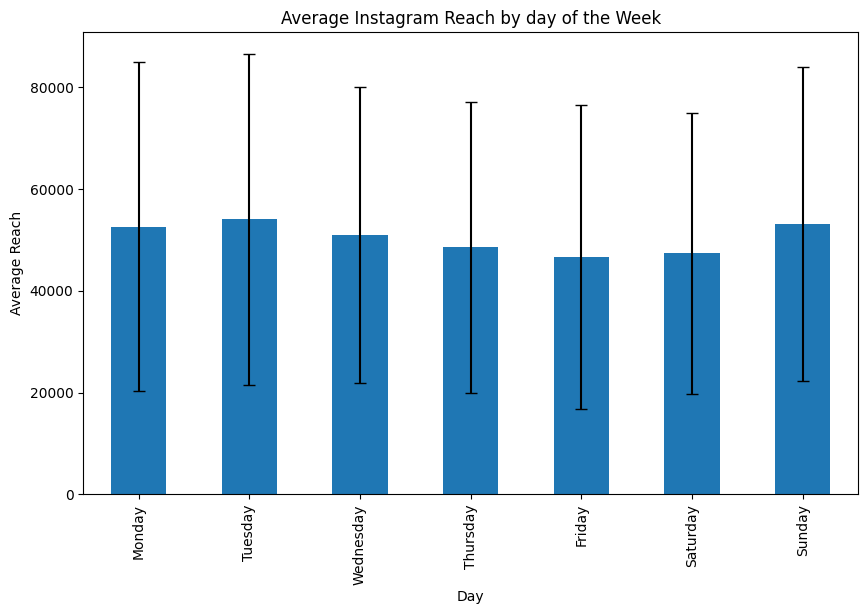

In [57]:

#using bar chart to see all statistics
plt.figure(figsize=(10, 6))
reach_by_day['mean'].plot(kind='bar', yerr=reach_by_day['std'], capsize=4)
plt.title('Average Instagram Reach by day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Reach')
plt.show()

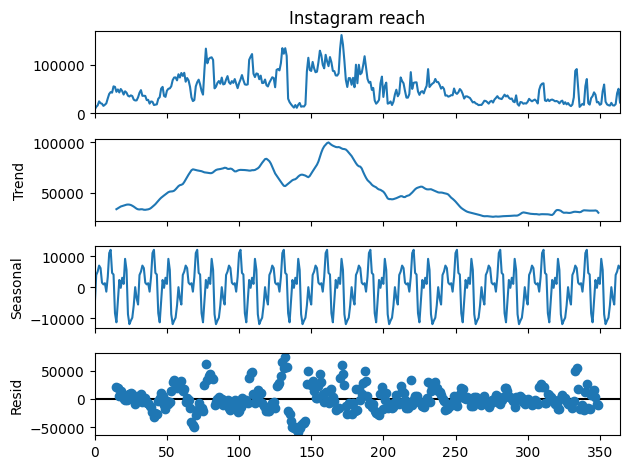

In [30]:
#q8
# Checking trends and seasonal patterns
decomposition = seasonal_decompose(data['Instagram reach'], model='additive', period=30)
#as the reach is on daily basis so 30 is used
decomposition.plot()
plt.show()


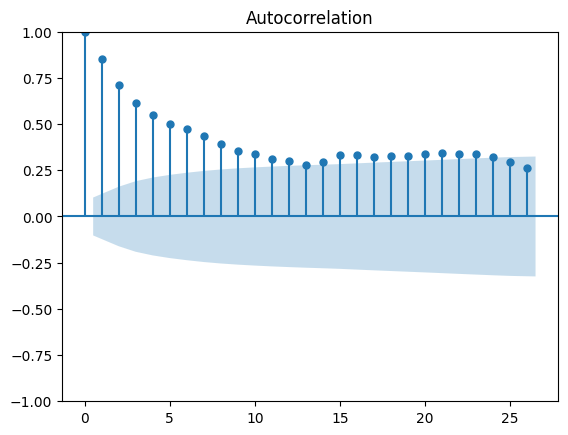

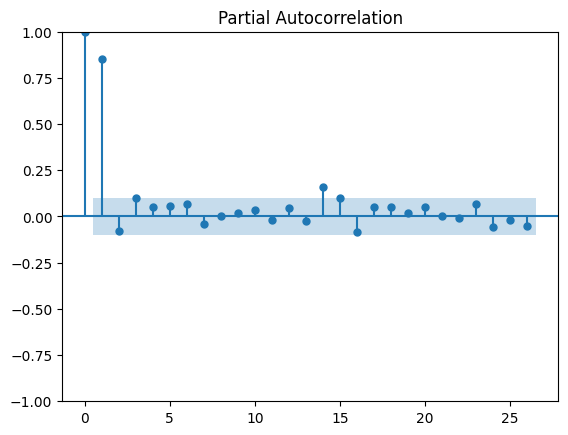

In [29]:
#q9
#using autocorrelation plot to find the value of p

plot_acf(data['Instagram reach'])
plt.show()


#using partial autocorrelation plot to find the value of p

plot_pacf(data['Instagram reach'])
plt.show()



In [54]:
#q10

model = SARIMAX(data['Instagram reach'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Make predictions
forecast = model_fit.forecast(steps=30)
forecast




e:\ML INTERNSHIP\AICP\Instagram_reach\enve\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
e:\ML INTERNSHIP\AICP\Instagram_reach\enve\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-04-01    15314.408220
2023-04-02    10252.938466
2023-04-03    13900.754050
2023-04-04    18425.612225
2023-04-05    25124.810057
2023-04-06    35627.255163
2023-04-07    40091.168887
2023-04-08    23013.753099
2023-04-09    24073.800053
2023-04-10    20425.951256
2023-04-11    17328.027268
2023-04-12    21829.337879
2023-04-13    23792.905869
2023-04-14    20276.347953
2023-04-15    22658.999953
2023-04-16    19528.657581
2023-04-17    25199.809804
2023-04-18    29018.217669
2023-04-19    24329.147343
2023-04-20    13731.244578
2023-04-21    12446.101962
2023-04-22    13140.108573
2023-04-23    14400.594198
2023-04-24    18711.093661
2023-04-25    15970.509516
2023-04-26    14317.660432
2023-04-27    20803.286138
2023-04-28    27903.826473
2023-04-29    37333.656468
2023-04-30    30545.314272
Freq: D, Name: predicted_mean, dtype: float64

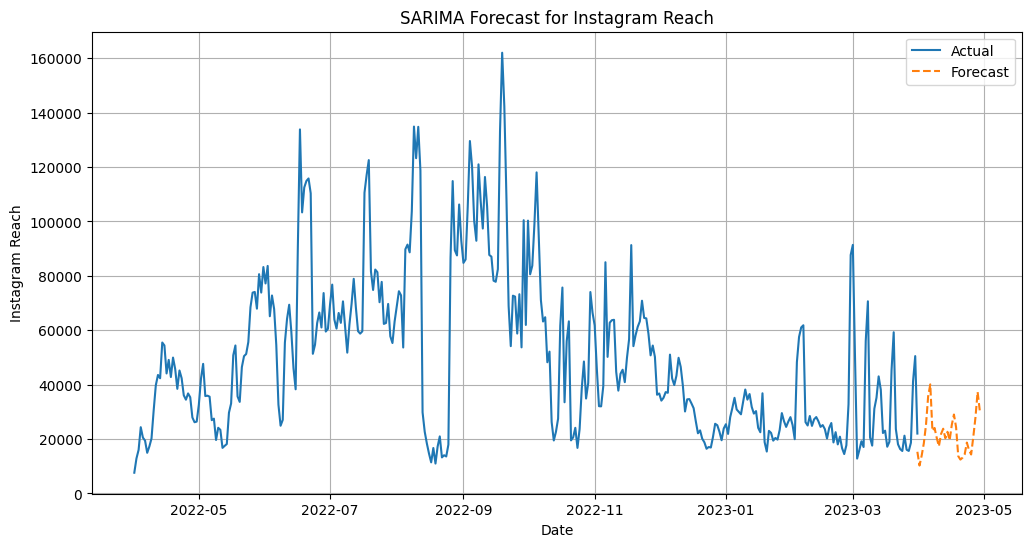

In [55]:

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Instagram reach'], label='Actual')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for Instagram Reach')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.show()